In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

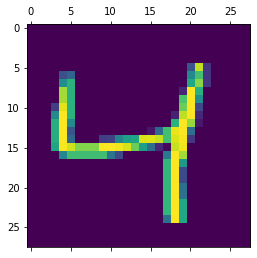

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[2]


4

In [9]:
y_train[1]

0

In [10]:
y_train[:5]
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train_flattend=x_train.reshape(len(x_train),28*28)
x_train_flattend.shape

(60000, 784)

In [12]:
x_test_flattend=x_test.reshape(len(x_test),28*28)
x_test_flattend.shape

(10000, 784)

In [13]:
x_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model=keras.Sequential([
 keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train_flattend,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 936us/step - loss: 0.4732 - accuracy: 0.8754
Epoch 2/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.3034 - accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2832 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.2619 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.2583 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.2550 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.2531 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 2s 940u

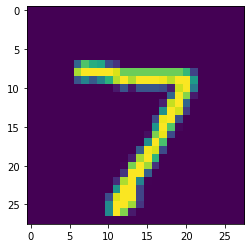

In [15]:
plt.imshow(x_test[0])

In [16]:
y_predict=model.predict(x_test_flattend)
y_predict[0]

array([4.33057547e-03, 8.66615313e-09, 1.50974095e-02, 9.65491652e-01,
       1.06915832e-03, 1.01650953e-01, 3.62468420e-08, 9.99793291e-01,
       6.47622049e-02, 6.16283059e-01], dtype=float32)

In [17]:
np.argmax(y_predict[0])

7

In [18]:
y_predict_label=[np.argmax(i)for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    8,  917,   22,    6,    3,   11,    9,   44,    5],
       [   4,    0,   14,  928,    0,   20,    2,   10,   22,   10],
       [   2,    1,    7,    2,  898,    0,    8,    4,    9,   51],
       [  10,    2,    1,   42,    7,  773,   11,    9,   31,    6],
       [  16,    3,    7,    1,    7,   18,  903,    1,    2,    0],
       [   2,    6,   19,    8,    6,    1,    0,  941,    4,   41],
       [   7,    6,    6,   25,    9,   18,    6,    8,  879,   10],
       [  11,    6,    1,    9,   17,    7,    0,   15,    6,  937]])>

Text(69.0, 0.5, 'True')

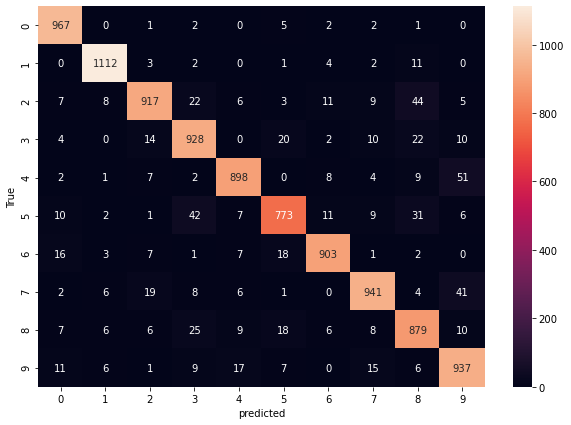

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True')